In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2025-07-02 05:35:22.061017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751434522.296286      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751434522.360161      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
# Load the data
(X_train, y_train), (_, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
# Select only first 2500 samples for faster training (as mentioned)
X = X_train[:2500]
y = y_train[:2500]

In [7]:
# Flatten the images: 28x28 → 784
X = X.reshape((2500, 28*28)).astype('float32') / 255

# One-hot encode the labels
y = to_categorical(y)


In [8]:
# Building your own digit recognition model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50,activation='relu',input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50,activation='relu'))

# Add the output layer
model.add(Dense(10,activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#
early_stop_monitor=EarlyStopping(patience=1)

# Fit the model
model_training=model.fit(X,y,validation_split=0.3,epochs=10,callbacks=[early_stop_monitor])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-02 05:35:39.251012: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3662 - loss: 2.0014 - val_accuracy: 0.8107 - val_loss: 0.8204
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8138 - loss: 0.7043 - val_accuracy: 0.8653 - val_loss: 0.4619
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8892 - loss: 0.4111 - val_accuracy: 0.8840 - val_loss: 0.3708
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9174 - loss: 0.2984 - val_accuracy: 0.9080 - val_loss: 0.3243
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9323 - loss: 0.2712 - val_accuracy: 0.9053 - val_loss: 0.3168
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9571 - loss: 0.2014 - val_accuracy: 0.9120 - val_loss: 0.2979
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9598 - loss: 0.1884 - val_accuracy: 0.9187 - val_loss: 0.2816
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9669 - loss: 0.1256 - val_accuracy: 0.9200 - val_loss: 0.2891


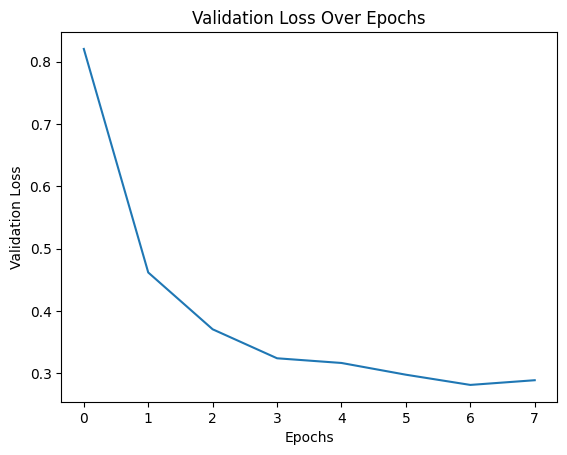

In [9]:
# Plot the validation loss
plt.plot(model_training.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Over Epochs')
plt.show()

In [10]:
model.save('mnist_model.h5')

In [11]:
# New dataset
(_, _), (X_test, y_test) = mnist.load_data()
X_test = X_test[:500].reshape((500, 28*28)).astype('float32') / 255
y_test = to_categorical(y_test[:500])
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9146 - loss: 0.2822 
Test accuracy: 0.8920000195503235


In [12]:
model.save('mnist_model_test.h5')

In [17]:
from PIL import Image
import numpy as np

# Load image from the uploaded input folder
img = Image.open('/kaggle/input/test-picture/MNIST_TEST.png').convert('L')  # grayscale.convert('L')  # grayscale

# Resize to 28x28 pixels
img = img.resize((28, 28))

# Convert to numpy array
img_array = np.array(img)

# Invert colors if needed
img_array = 255 - img_array

# Normalize
img_array = img_array.astype('float32') / 255.0

# Reshape to match input shape of model: (1, 784)
img_array = img_array.reshape(1, 784)


In [18]:
# Predict using the trained model
prediction = model.predict(img_array)

# Get the digit with highest probability
predicted_digit = prediction.argmax()

print("Predicted Digit:", predicted_digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Digit: 5
